In [4]:
# Подготовка таблицы из директории
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

def get_tables(dir='./blood-pressure-estimation-data/T1/smooth/100/', k1=20, k2=30):
    files = os.listdir(dir)
    table = np.ndarray((len(files), 4 + 2 * get_data_shape() + k1 * 3 + k2 * 3), np.float64)

    idx = 0
    for file_name in files:
        if file_name[:4] != 'subj':
            continue
        print(file_name)
        user, id = map(int, file_name[4:-4].split('log'))
        df = pd.read_csv(dir + file_name, header=None)
        d1, d2 = df.loc[0, :]
        p1, p2 = df.loc[1:, 0].values, df.loc[1:, 1].values
        plt.scatter(p2, p1)
        plt.show()
        plt.scatter(p1, p2)
        plt.show()
        table[idx] = [id, user, d1, d2] + get_data(p1) + get_data(p2) + get_data_2(p1, p2, k=k1) + get_data_2(p2, p1, k=k2)
        idx += 1
    
    return table

In [5]:
# Генерируемые характеристики последовательности
import statistics as stat
%matplotlib inline
import matplotlib.pyplot as plt

def get_data(seq):
    sq = seq[1000:-1000]
    median = stat.median(sq)
    mean = stat.mean(sq)
    # mode = stat.mode(sq)
    var = stat.variance(sq)
    return [median, mean, var]

def get_data_2(y, x, k=100):
    min_x, max_x = x.min(), x.max()
    x_dis = np.array(np.linspace(min_x, max_x, num=k))
    out = []
    for i, x_point in enumerate(x_dis):
        if i==0:
            g=(x_dis[1]-x_dis[0])/2
        elif i==len(x_dis) - 1:
            g=(x_dis[-1]-x_dis[-2])/2
        else:
            g = min(x_dis[i]-x_dis[i-1], x_dis[i+1]-x_dis[i])/2
        y_points = y[(x<x_point+g) & (x>x_point-g)]
        t = 1
        while(len(y_points)==0):
            y_points = y[(x<x_point+g*t) & (x>x_point-g*t)]
            t *= 2
        out += [y_points.min(), y_points.max(), y_points.max()-y_points.min()]
        plt.plot([x_point, x_point], [y_points.min(), y_points.max()])
        plt.scatter([x_point, x_point], [y_points.min(), y_points.max()])
    plt.show()
    return out

def get_data_shape():
    return len(get_data([1] * 5000))


subj11log673.csv


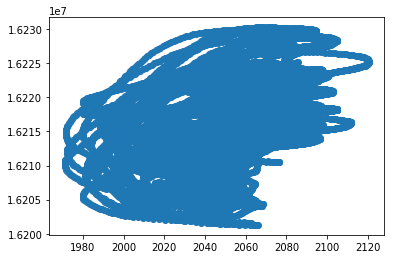

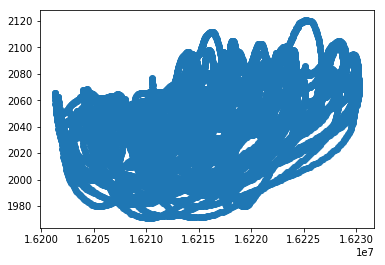

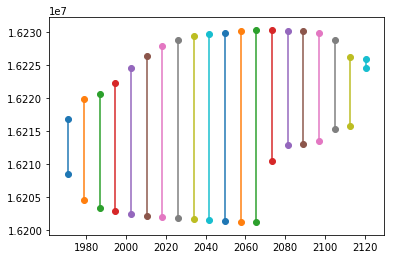

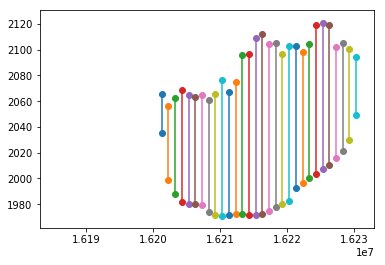

subj11log674.csv


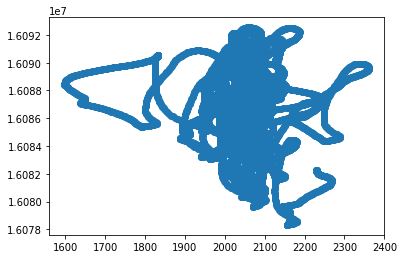

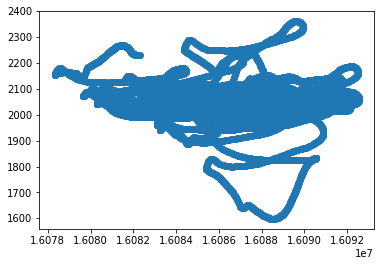

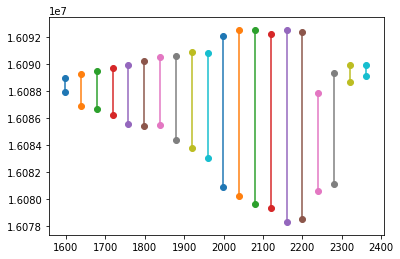

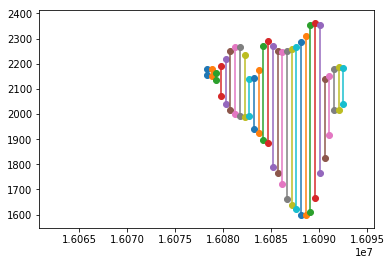

subj11log675.csv


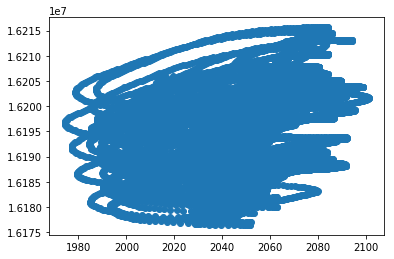

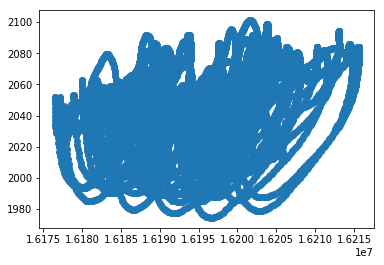

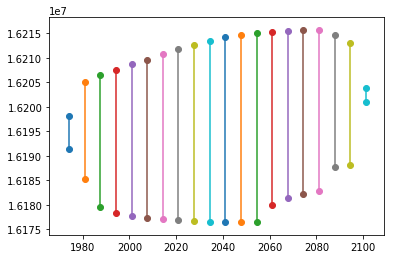

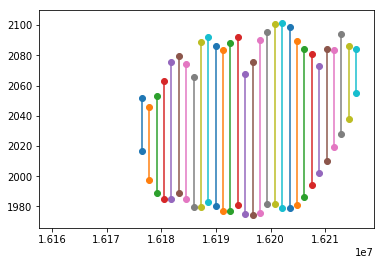

subj11log676.csv


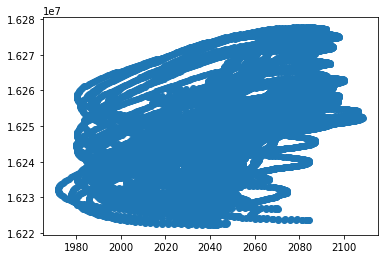

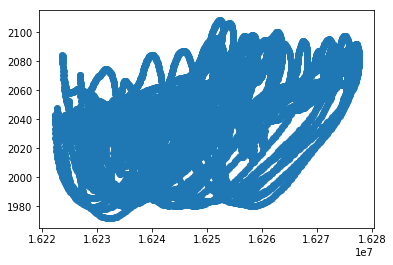

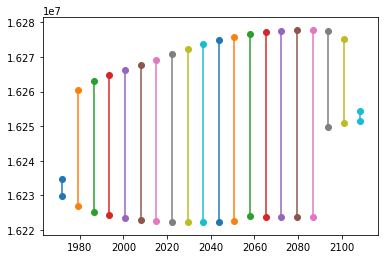

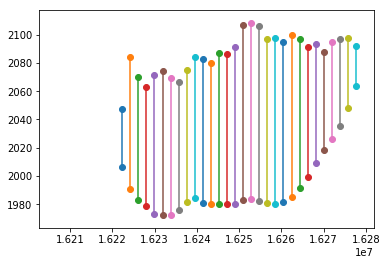

subj11log677.csv


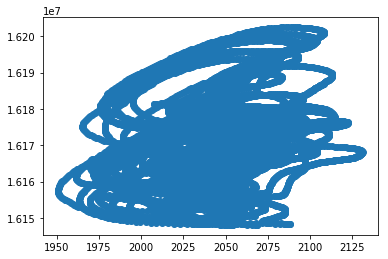

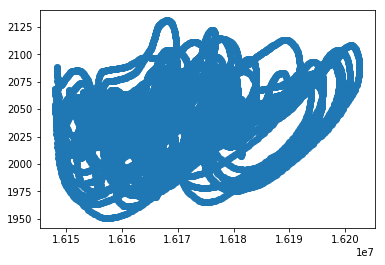

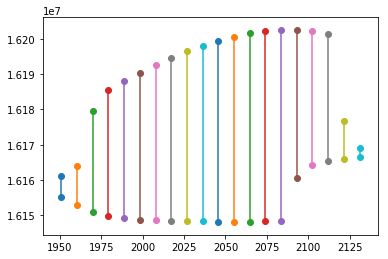

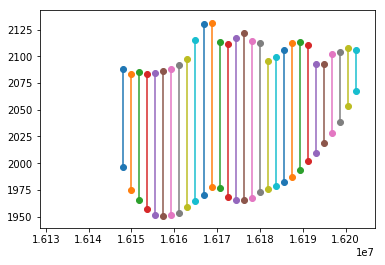

subj11log678.csv


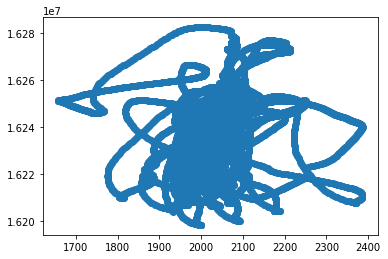

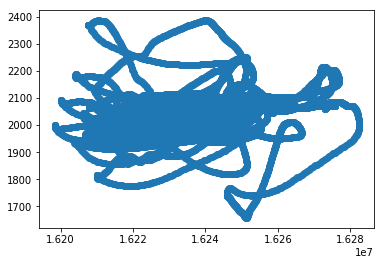

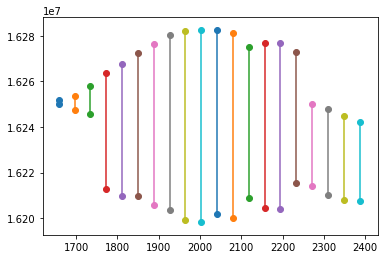

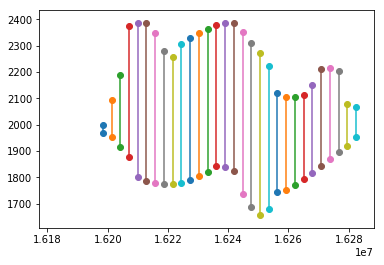

subj11log679.csv


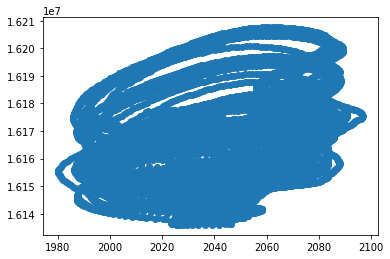

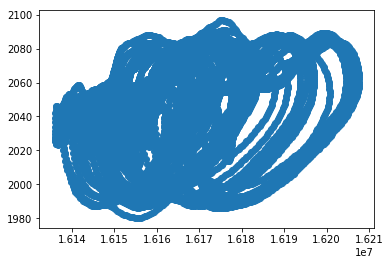

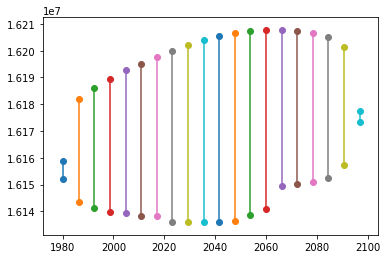

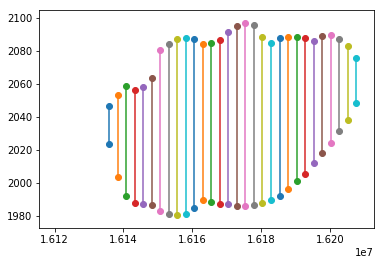

subj11log680.csv


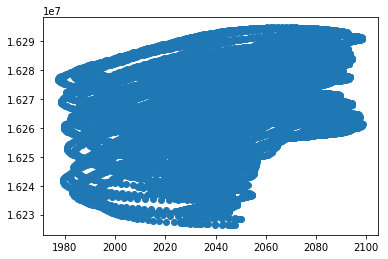

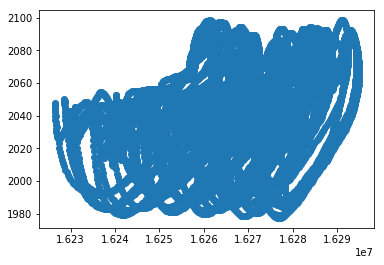

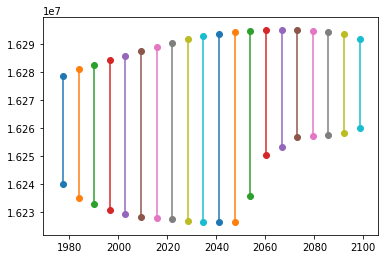

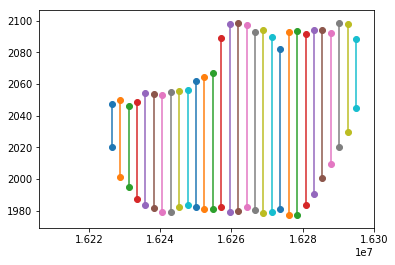

subj11log681.csv


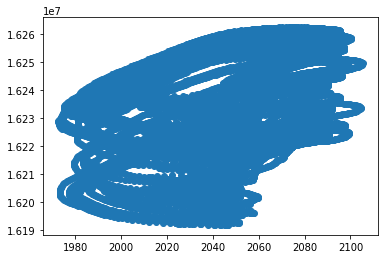

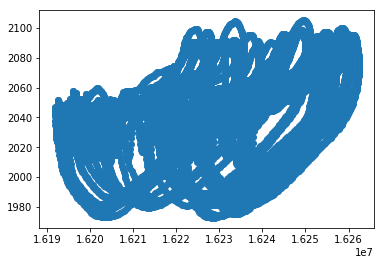

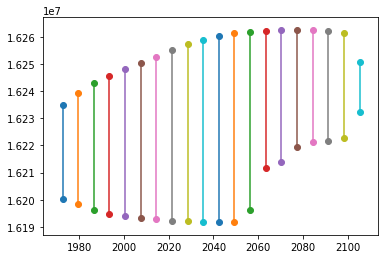

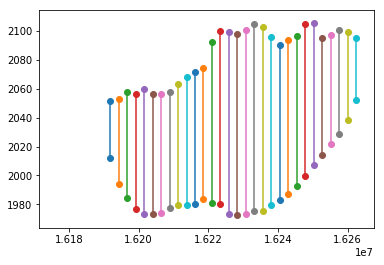

subj11log682.csv


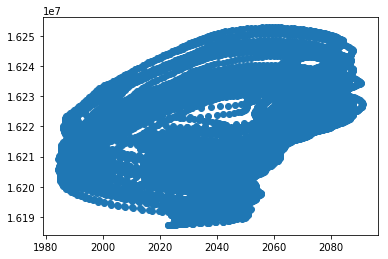

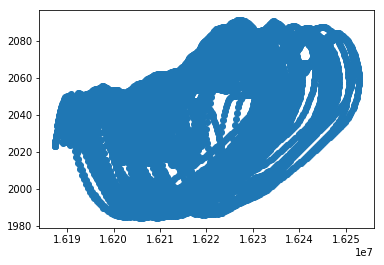

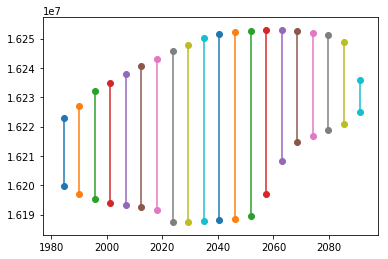

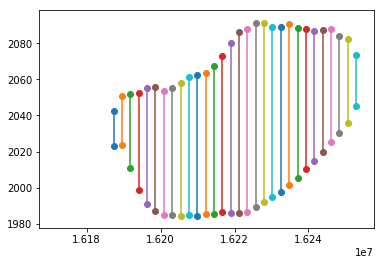

subj11log683.csv


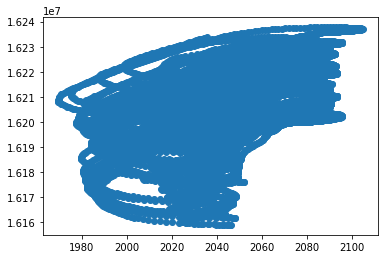

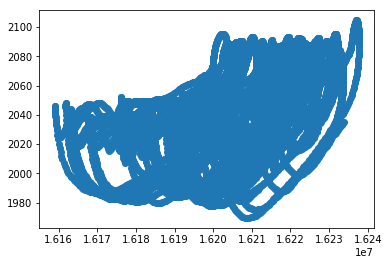

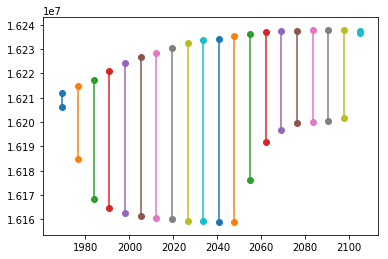

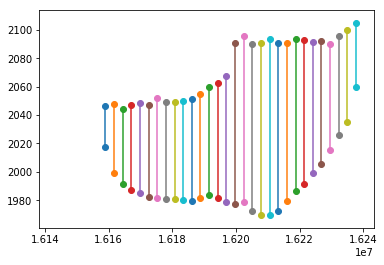

subj11log684.csv


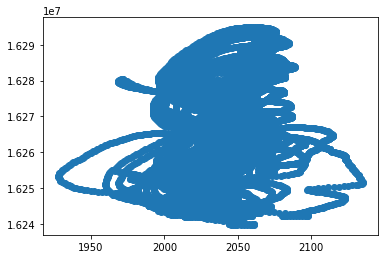

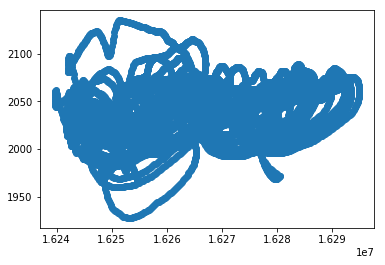

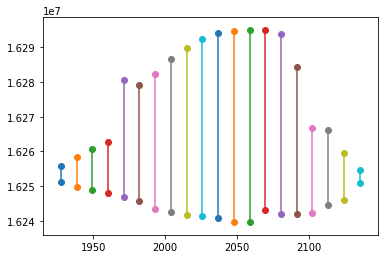

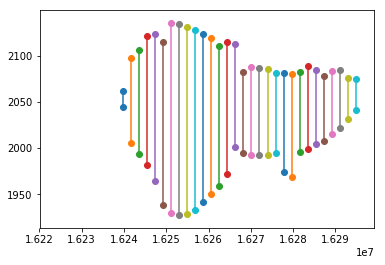

subj11log685.csv


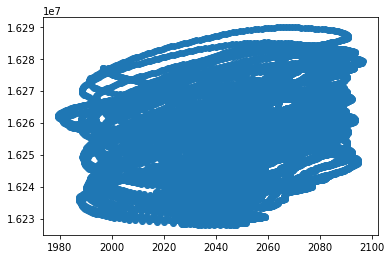

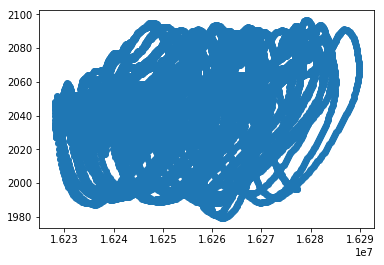

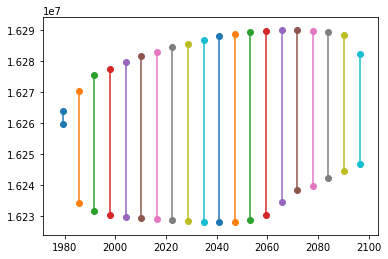

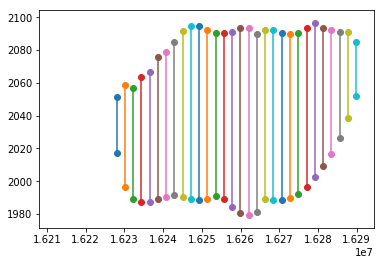

subj11log686.csv


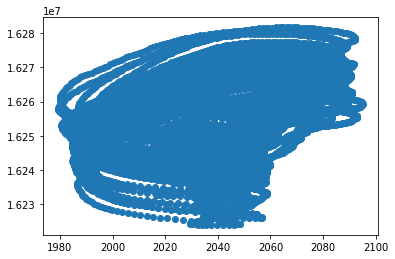

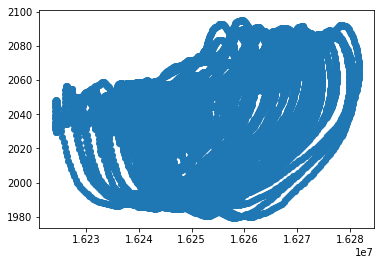

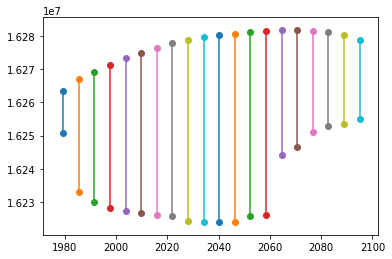

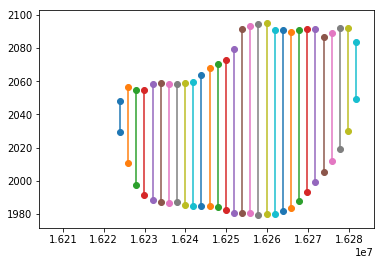

subj11log687.csv


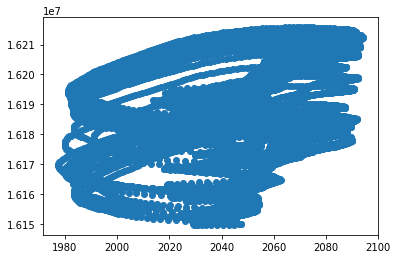

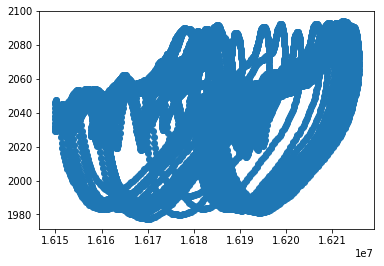

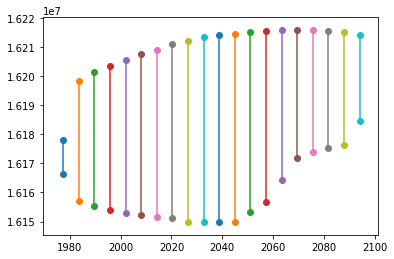

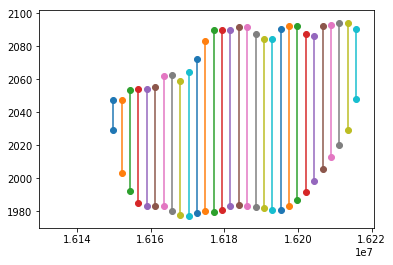

subj11log688.csv


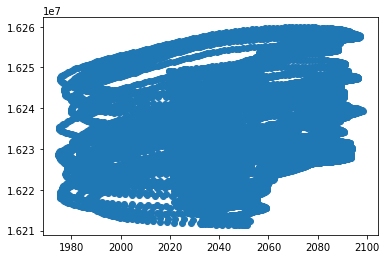

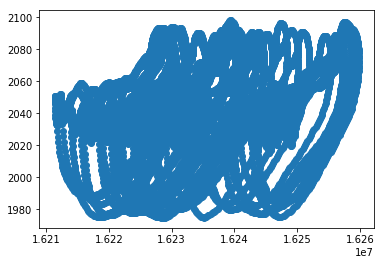

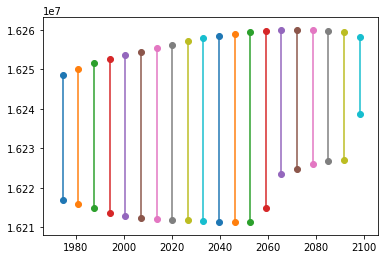

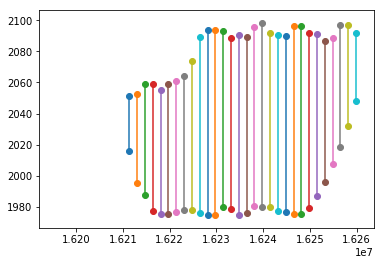

subj11log689.csv


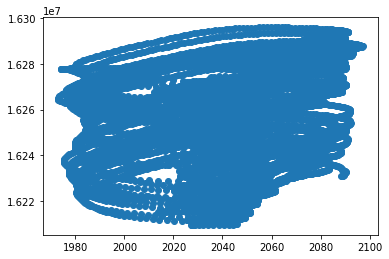

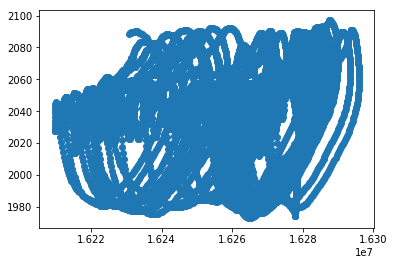

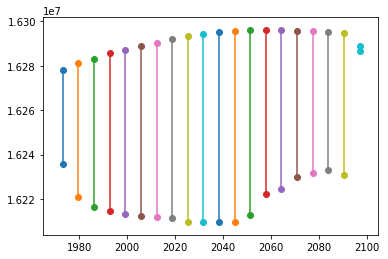

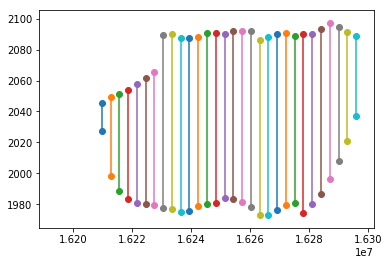

subj11log690.csv


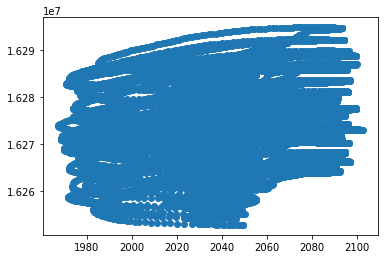

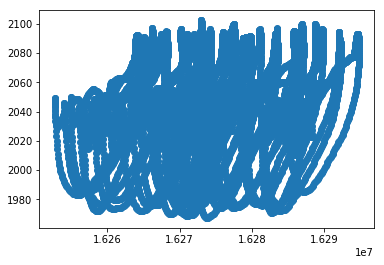

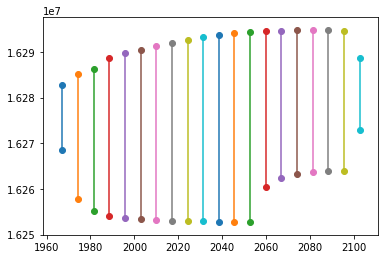

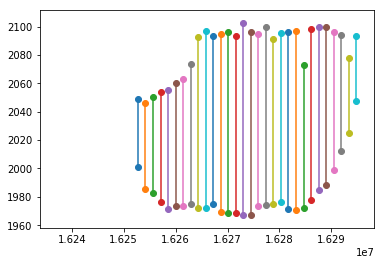

subj11log691.csv


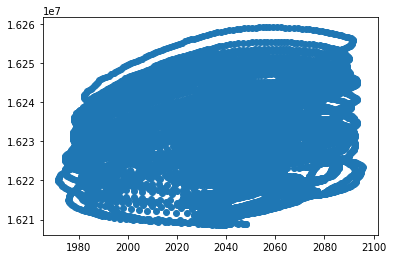

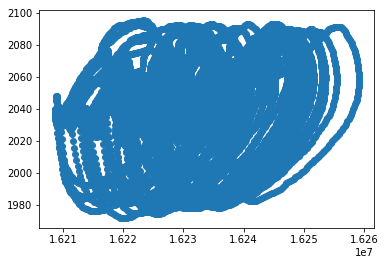

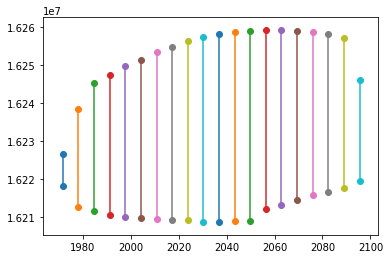

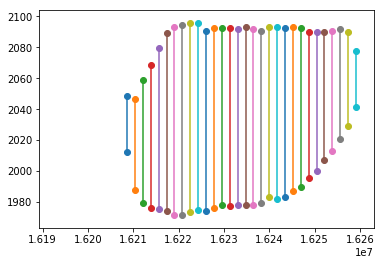

subj11log692.csv


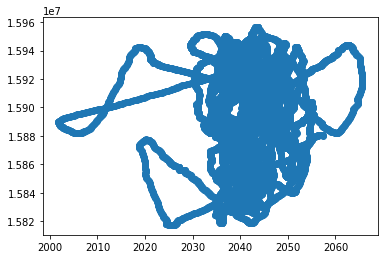

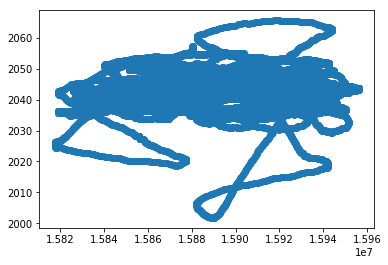

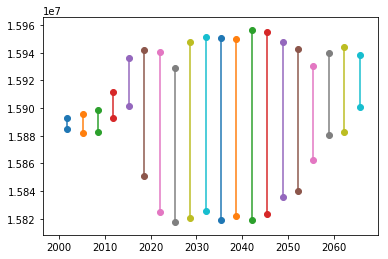

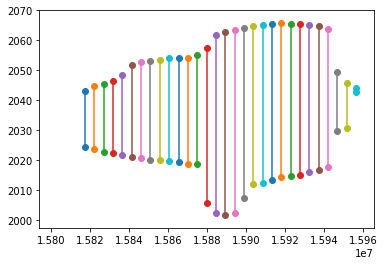

subj11log693.csv


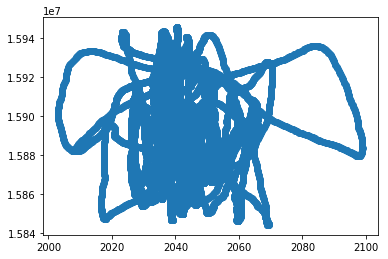

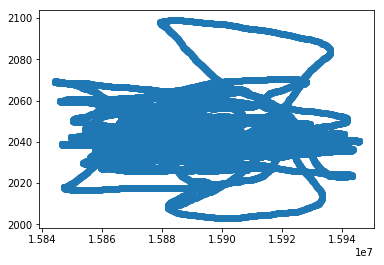

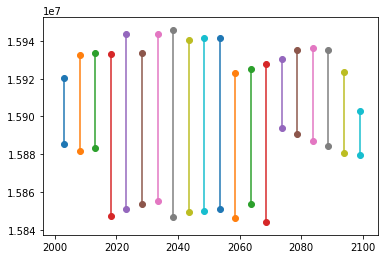

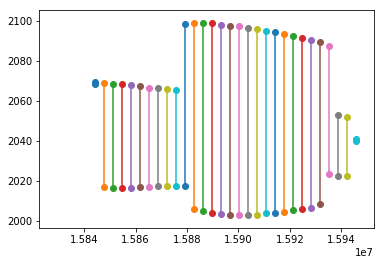

subj11log694.csv


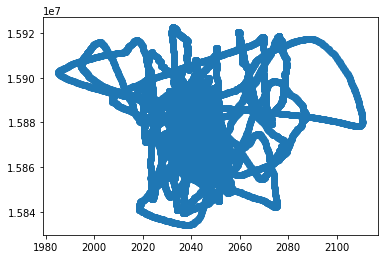

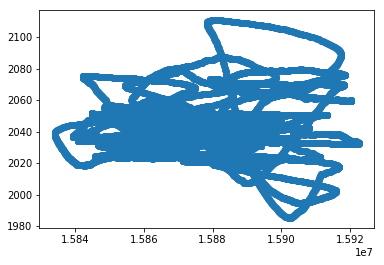

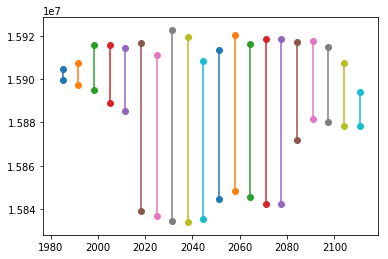

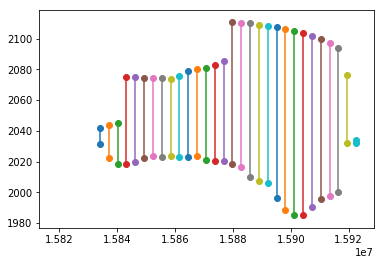

subj11log695.csv


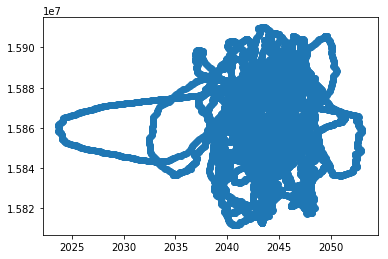

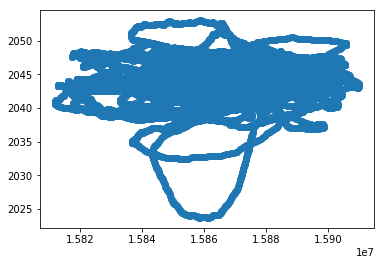

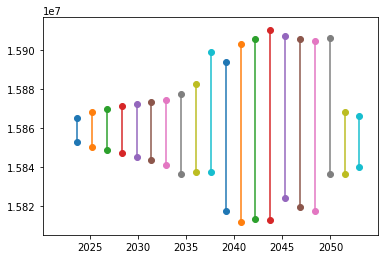

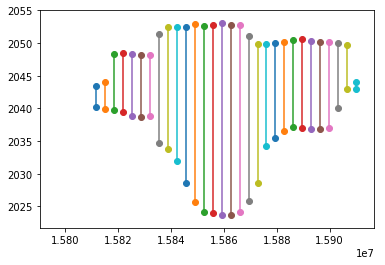

subj11log696.csv


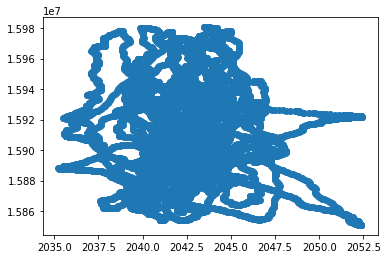

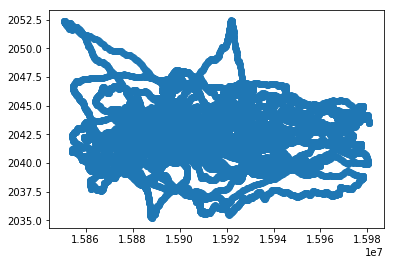

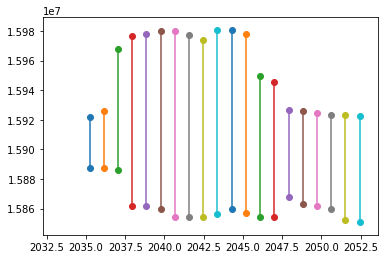

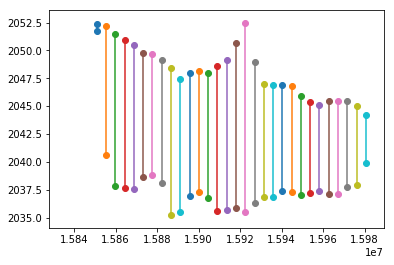

subj11log697.csv


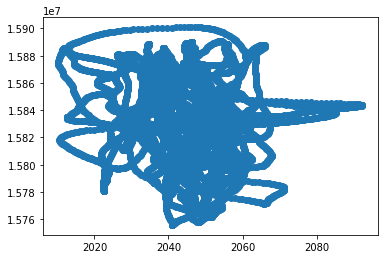

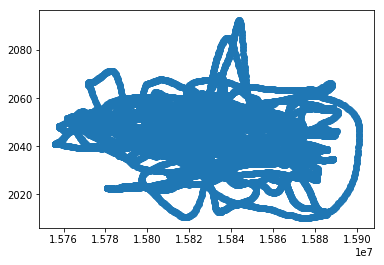

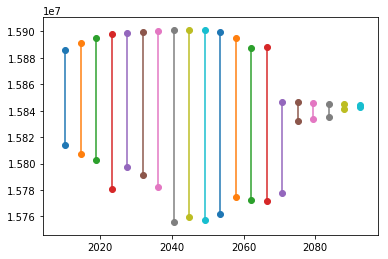

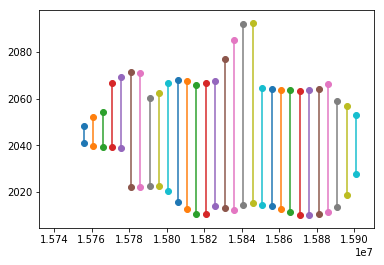

subj11log698.csv


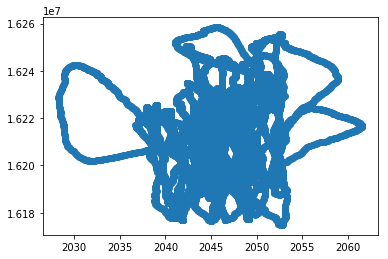

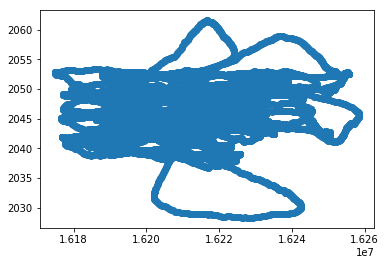

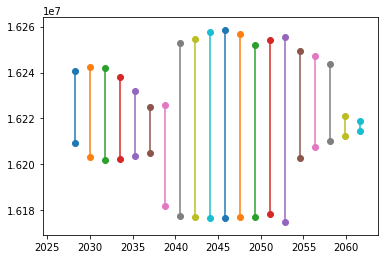

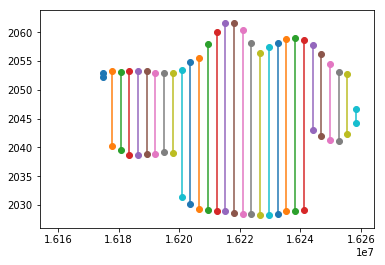

subj11log699.csv


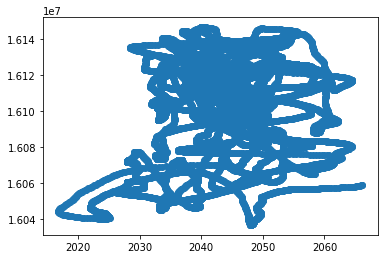

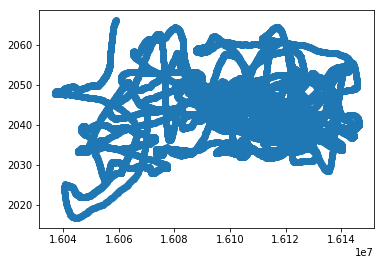

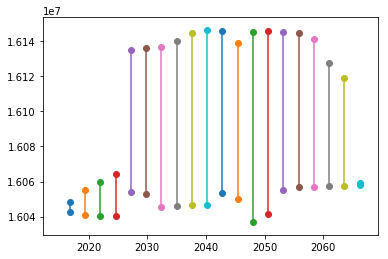

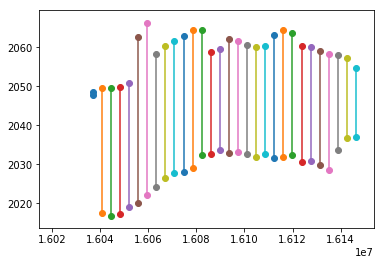

subj11log700.csv


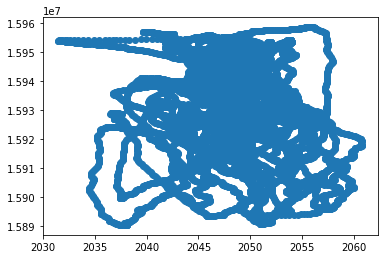

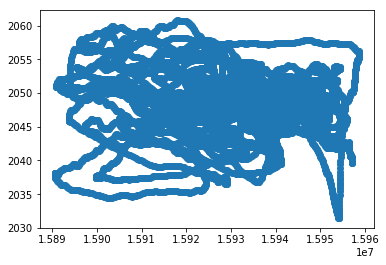

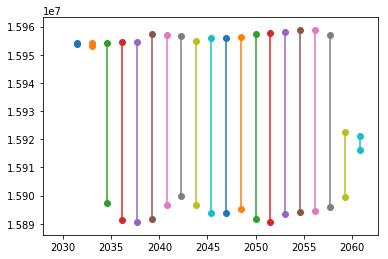

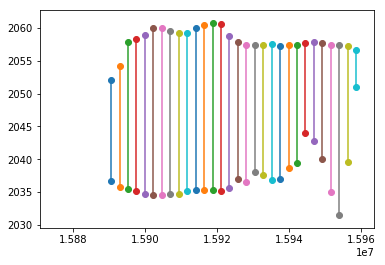

subj11log701.csv


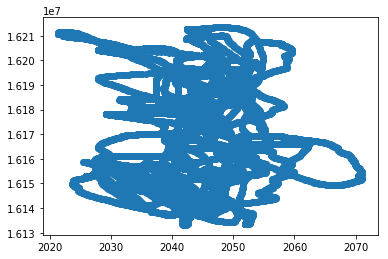

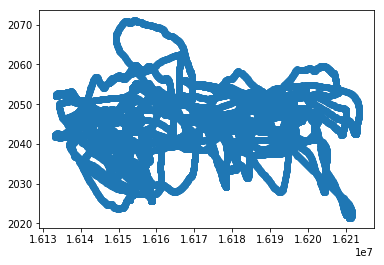

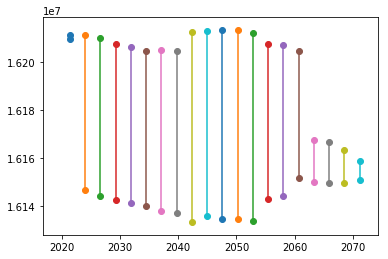

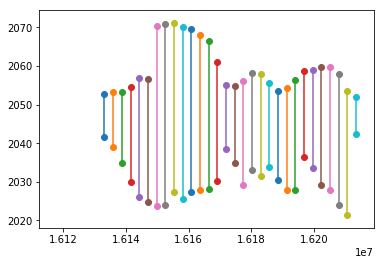

subj11log702.csv


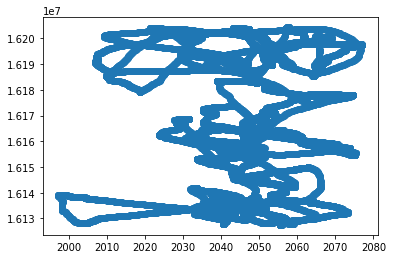

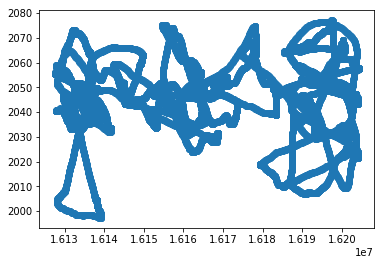

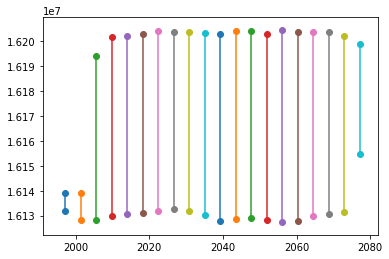

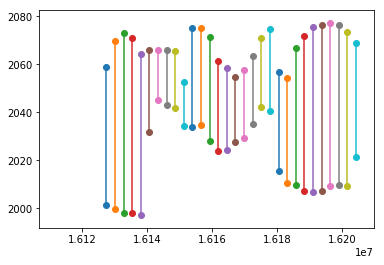

subj11log703.csv


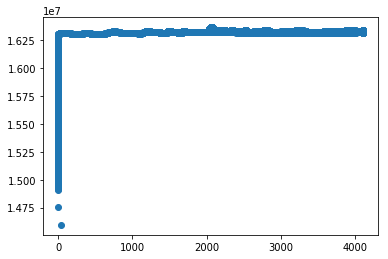

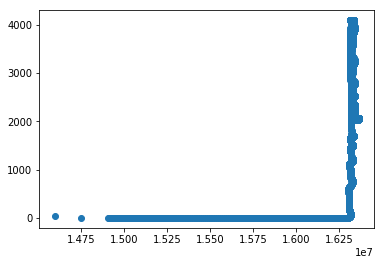

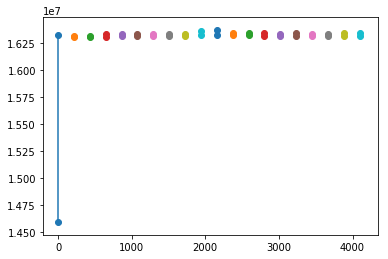

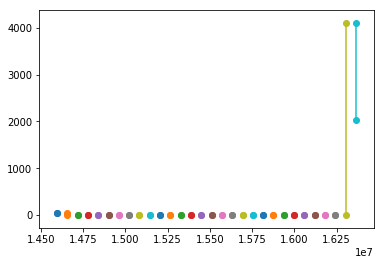

subj11log704.csv


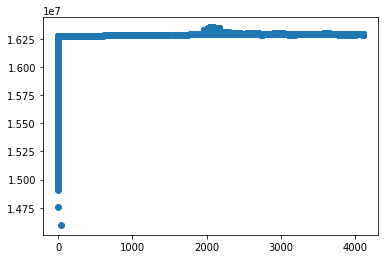

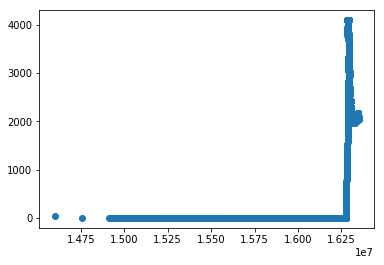

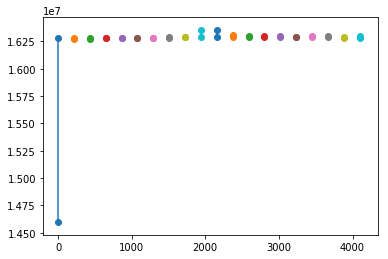

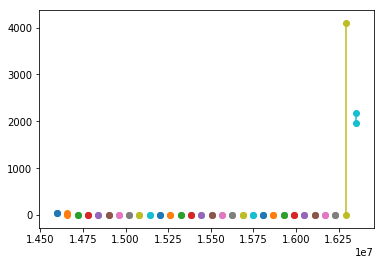

subj11log705.csv


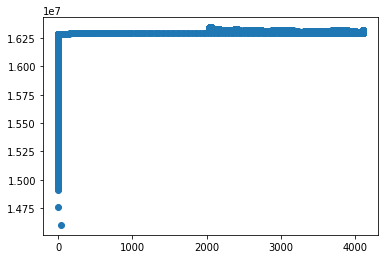

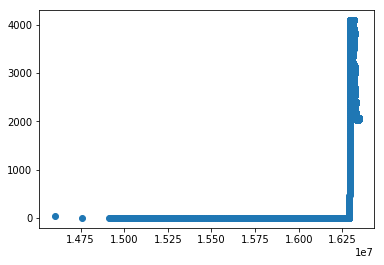

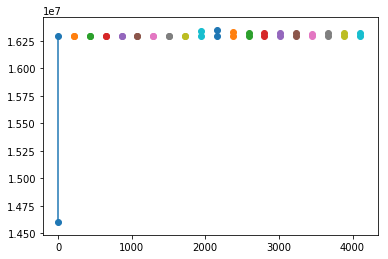

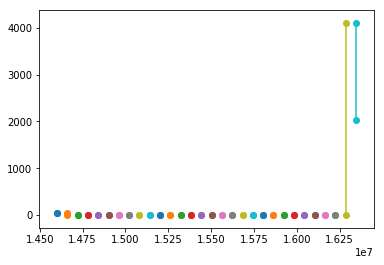

subj11log706.csv


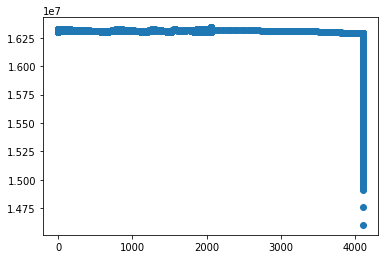

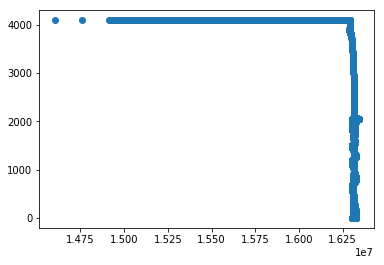

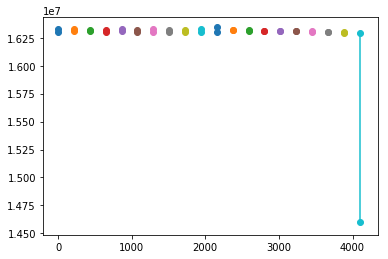

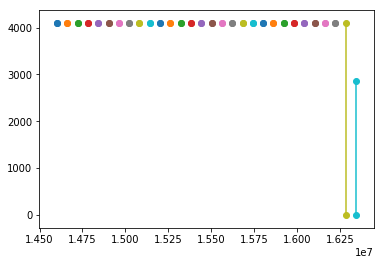

subj11log707.csv


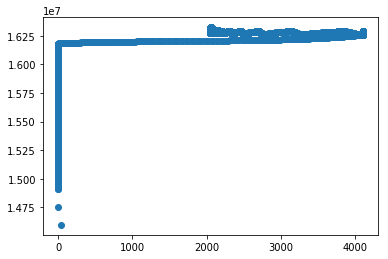

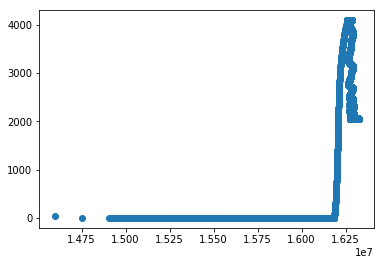

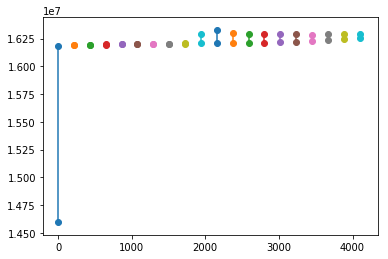

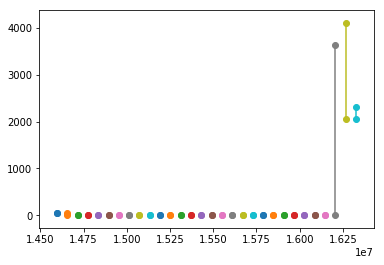

subj11log708.csv


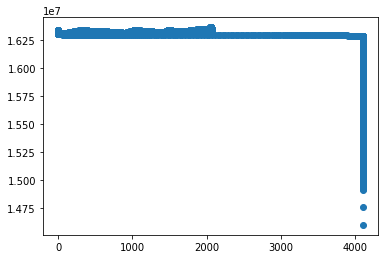

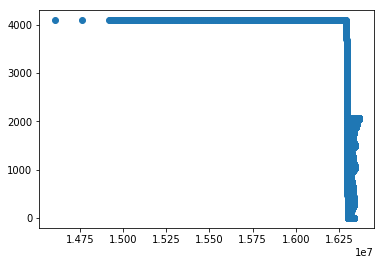

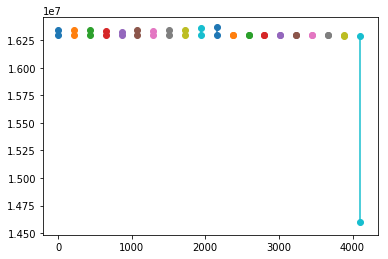

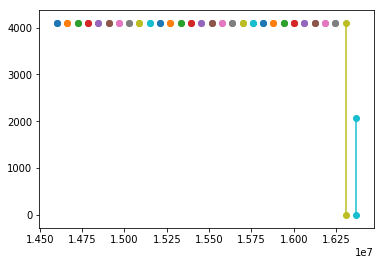

subj11log709.csv


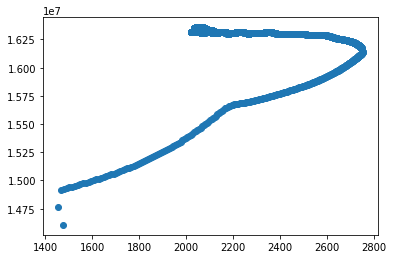

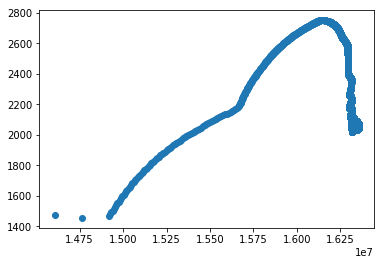

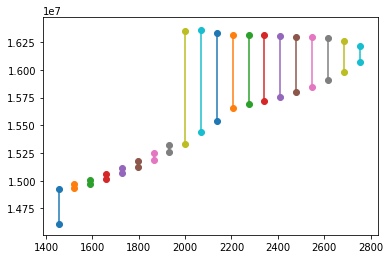

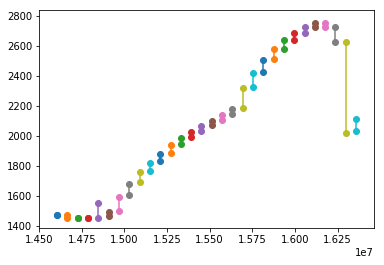

subj11log710.csv


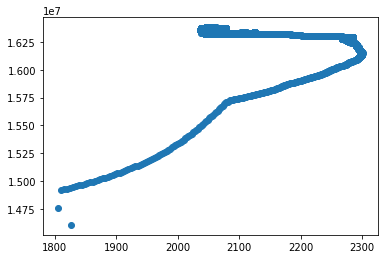

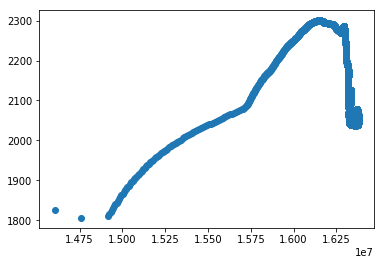

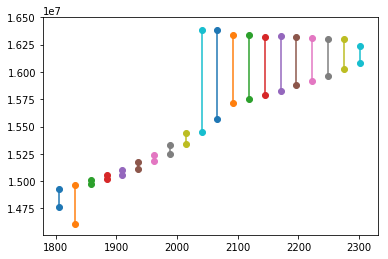

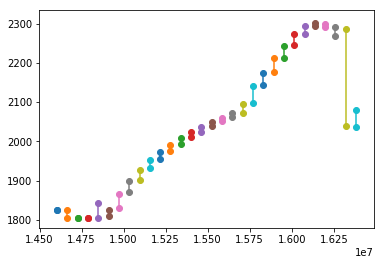

subj11log711.csv


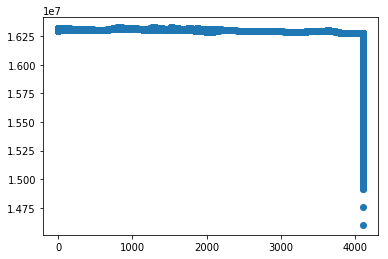

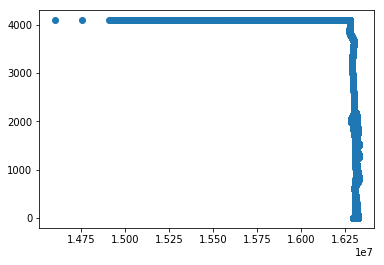

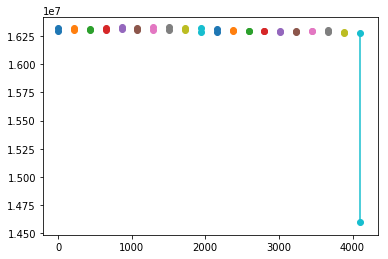

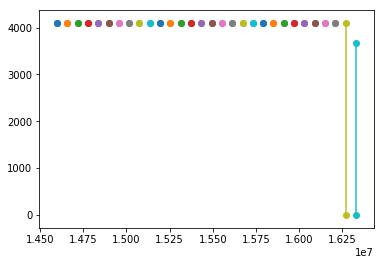

subj11log712.csv


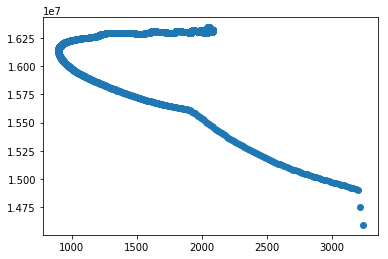

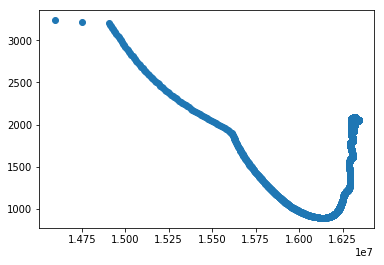

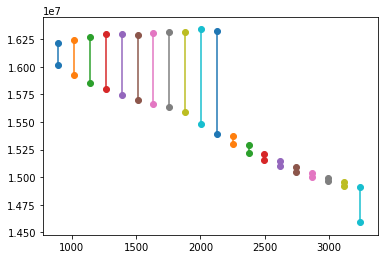

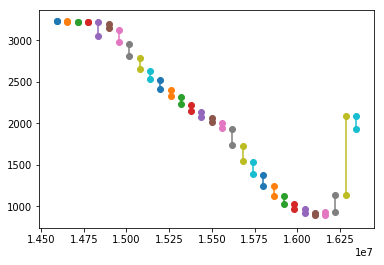

subj11log713.csv


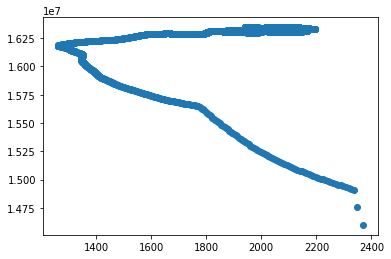

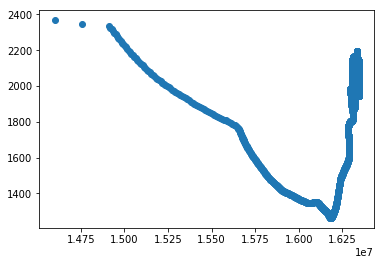

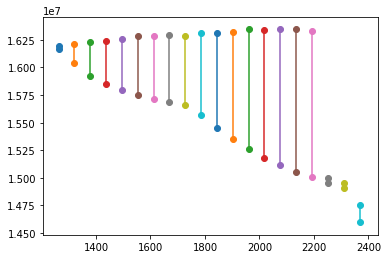

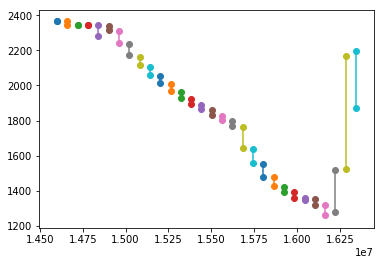

subj11log714.csv


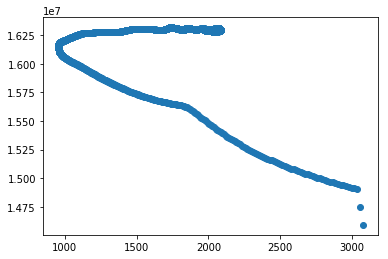

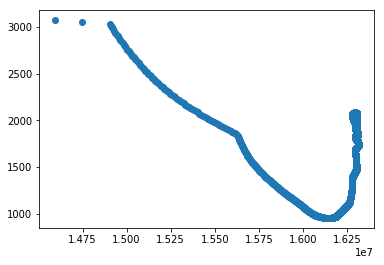

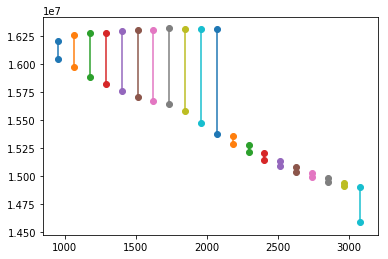

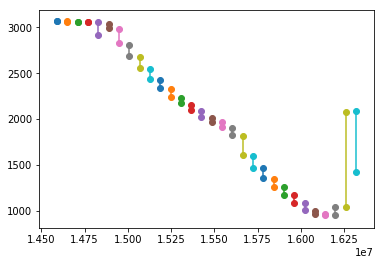

subj11log715.csv


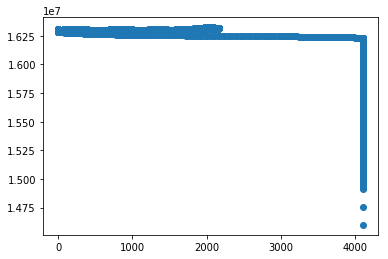

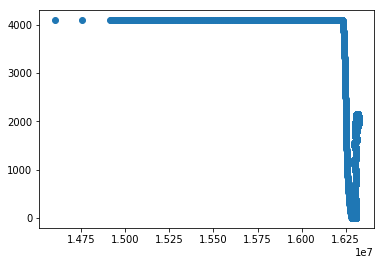

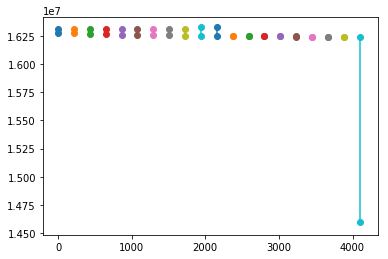

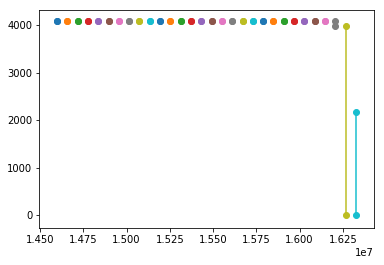

subj11log716.csv


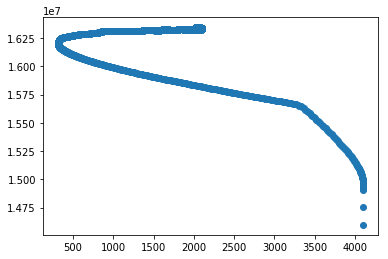

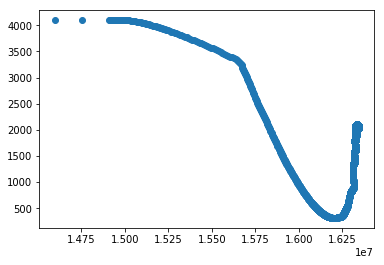

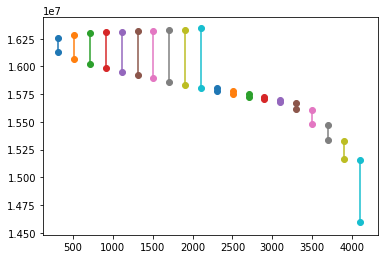

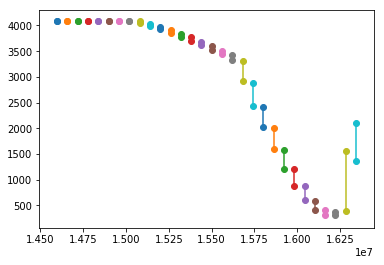

subj11log717.csv


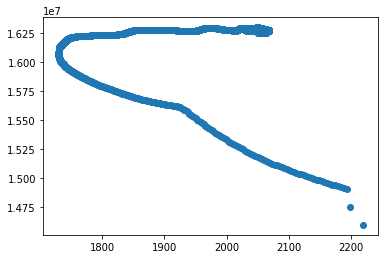

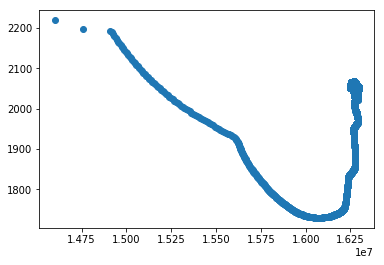

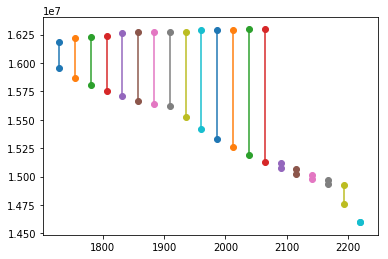

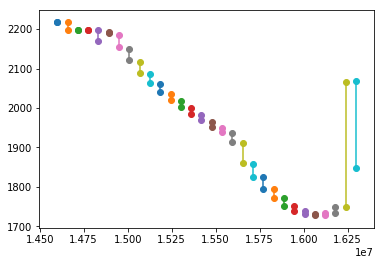

subj11log718.csv


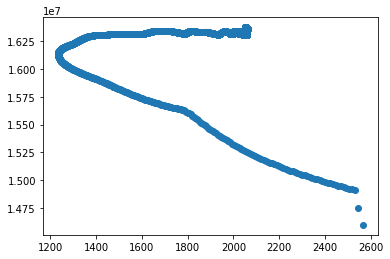

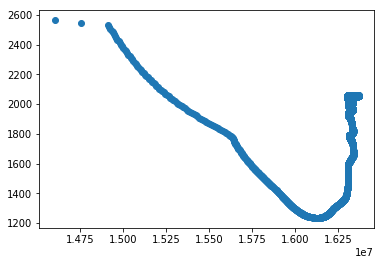

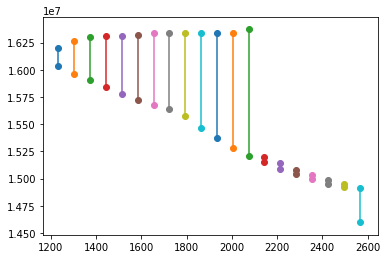

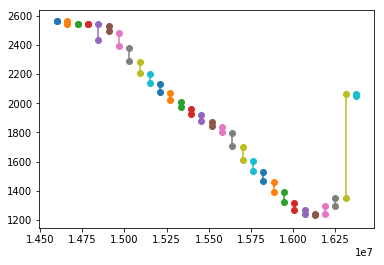

subj11log719.csv


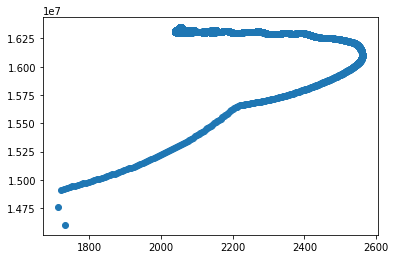

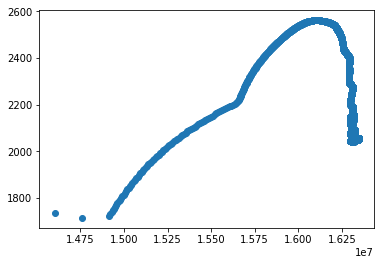

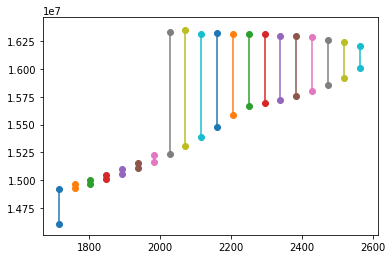

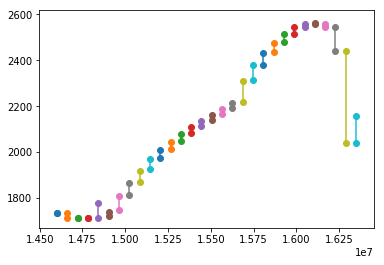

subj11log720.csv


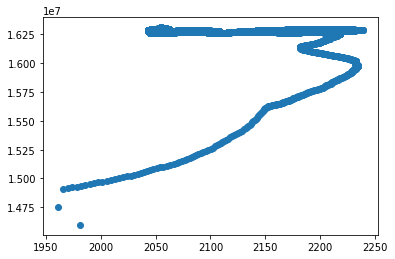

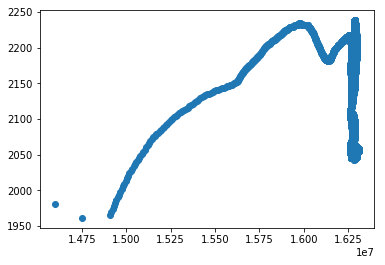

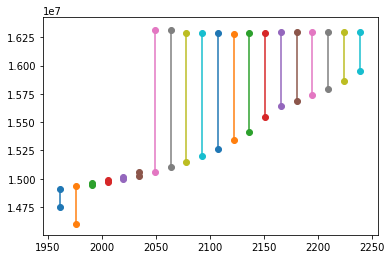

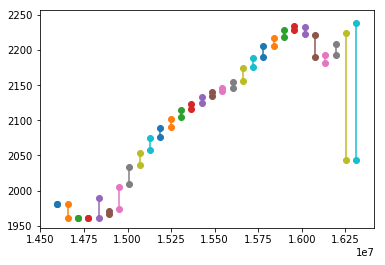

subj11log721.csv


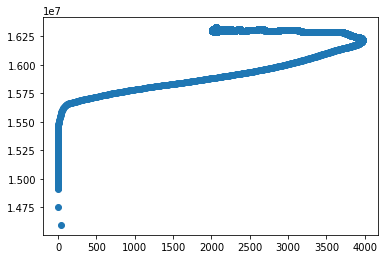

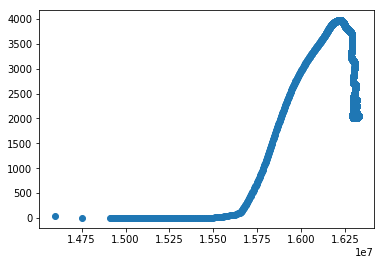

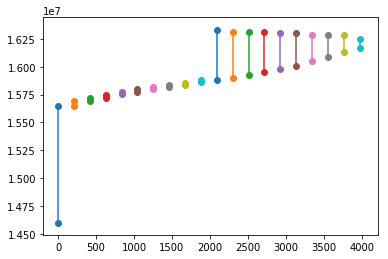

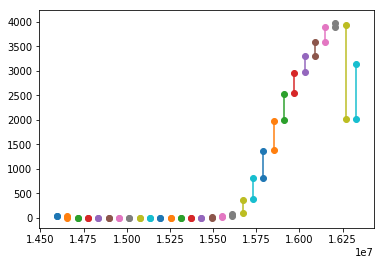

subj11log722.csv


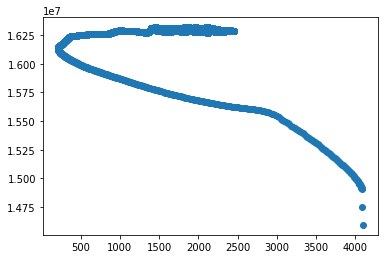

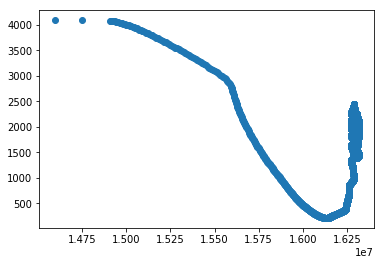

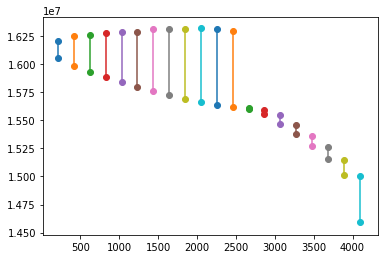

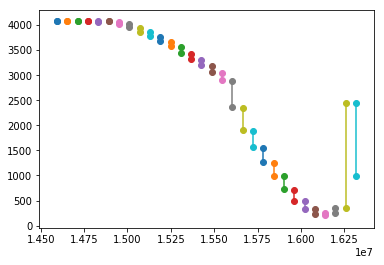

subj11log723.csv


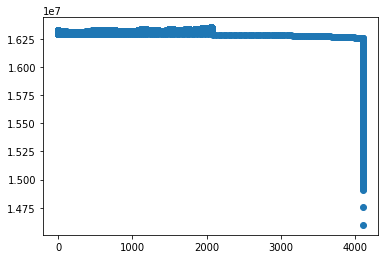

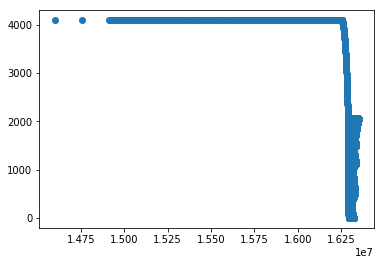

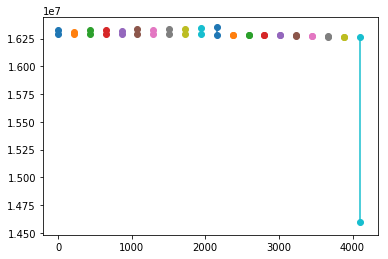

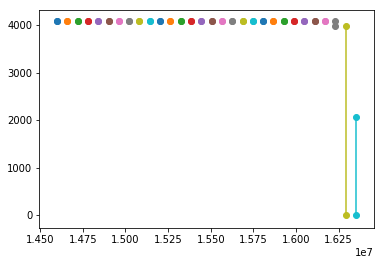

subj11log724.csv


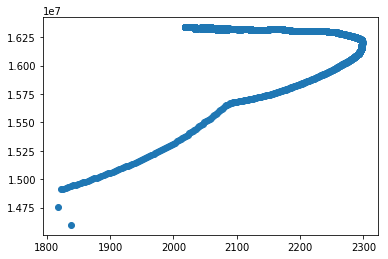

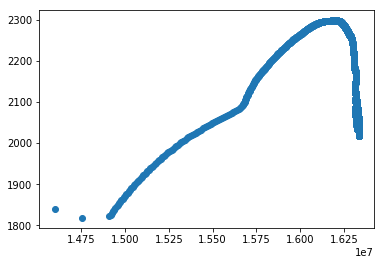

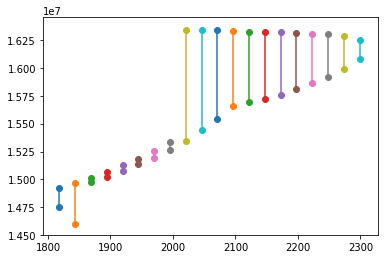

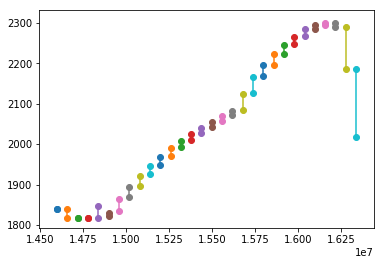

subj11log725.csv


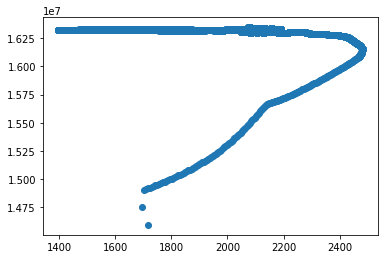

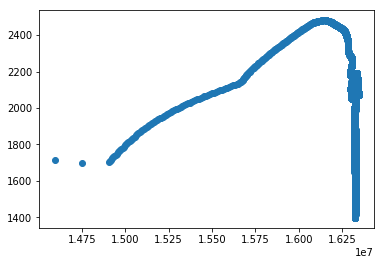

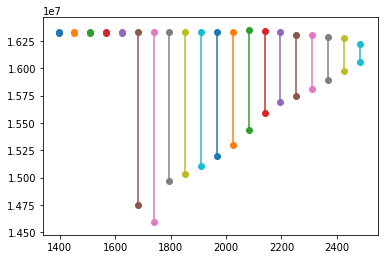

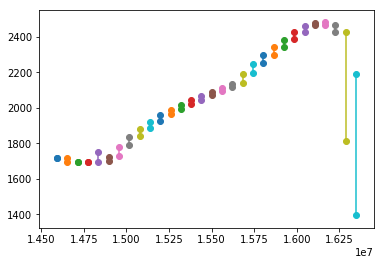

subj11log726.csv


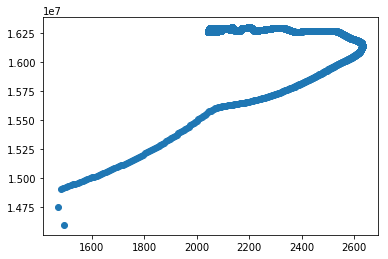

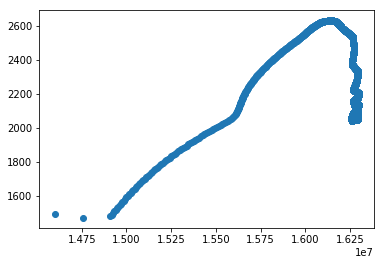

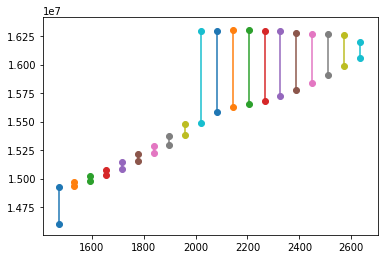

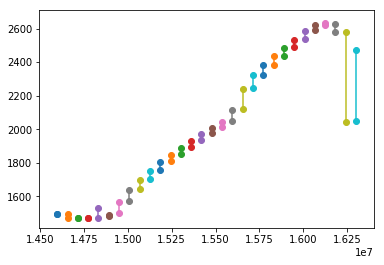

subj11log727.csv


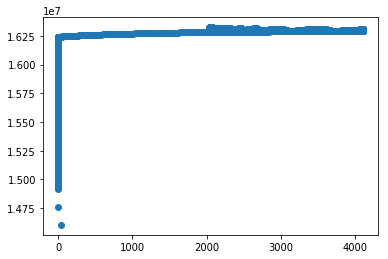

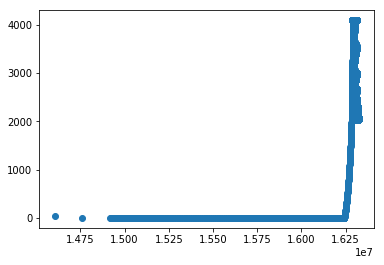

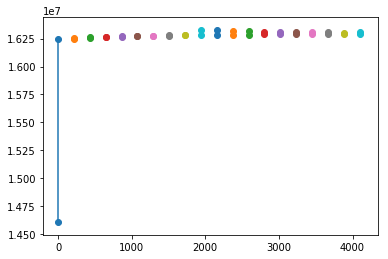

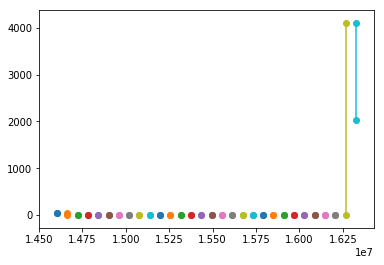

subj14log847.csv


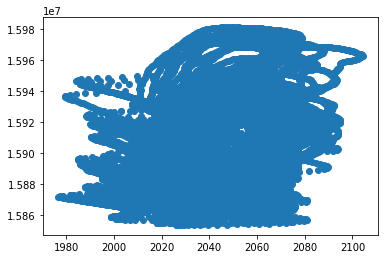

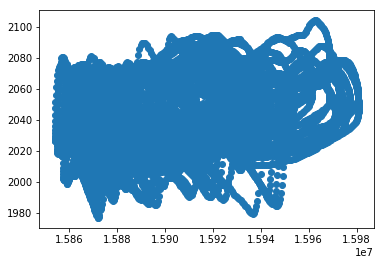

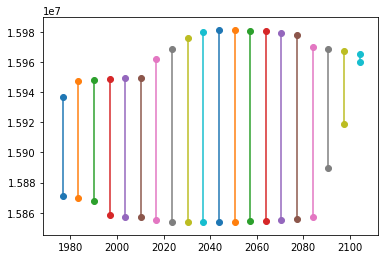

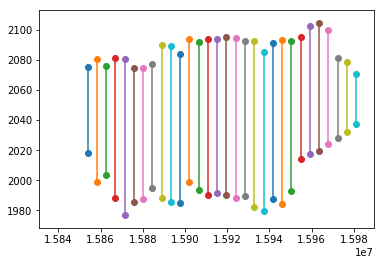

subj14log848.csv


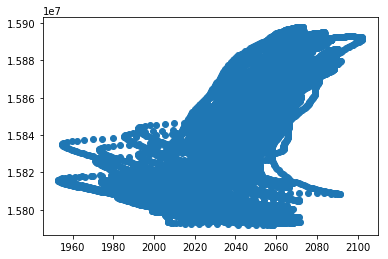

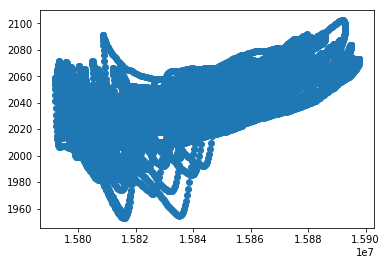

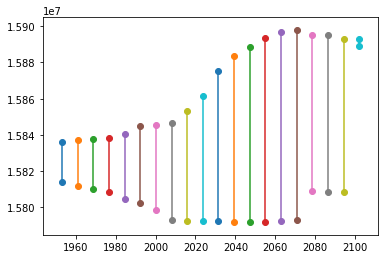

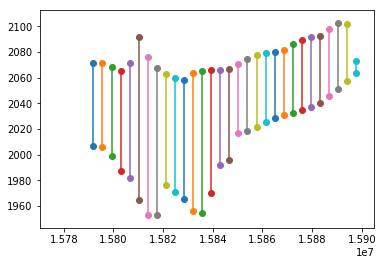

subj14log849.csv


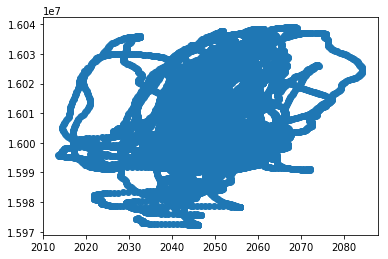

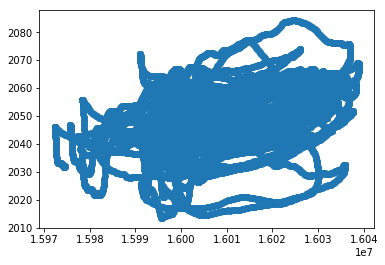

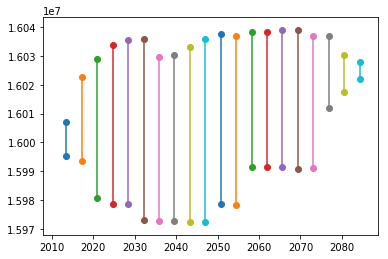

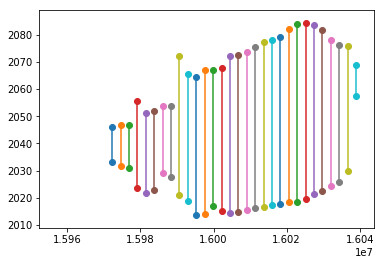

subj14log850.csv


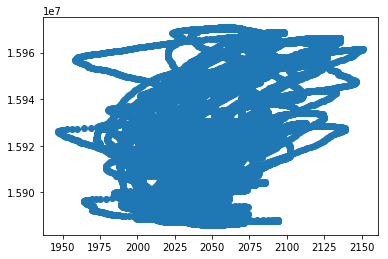

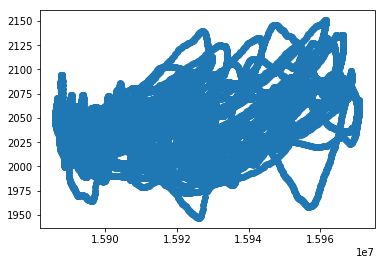

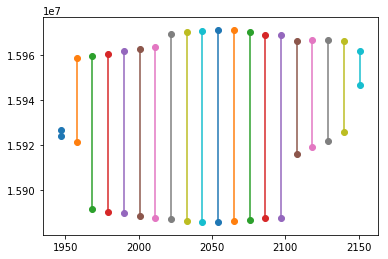

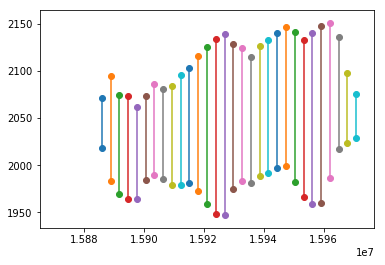

subj14log851.csv


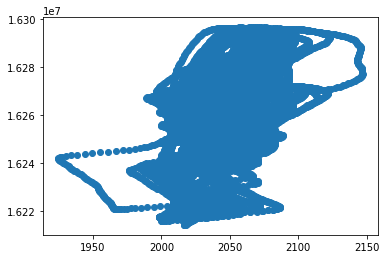

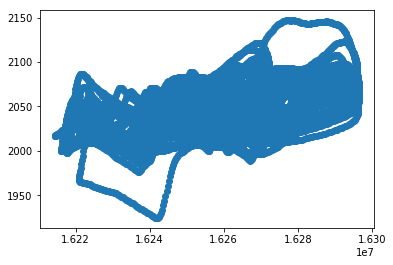

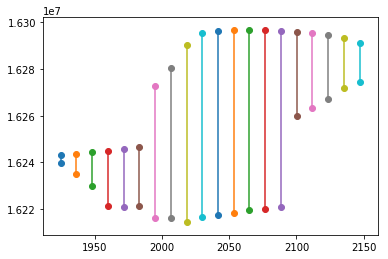

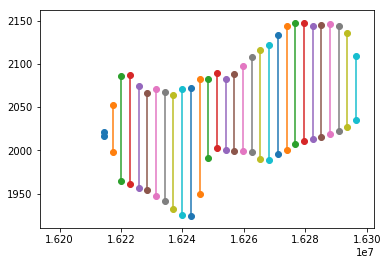

subj14log852.csv


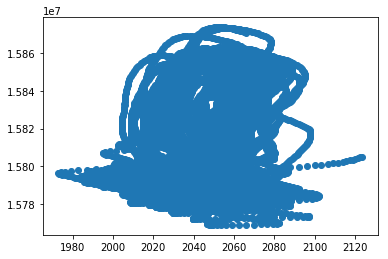

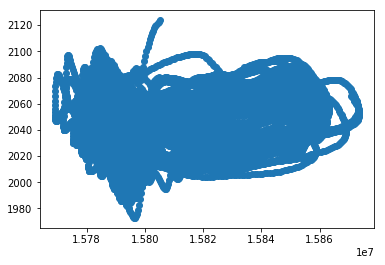

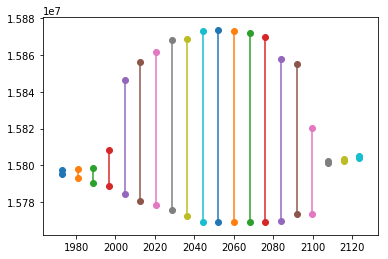

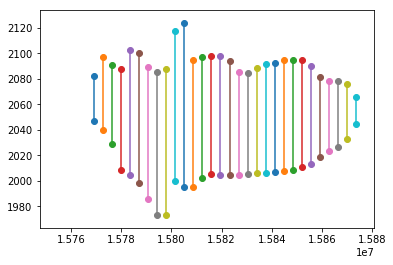

subj14log853.csv


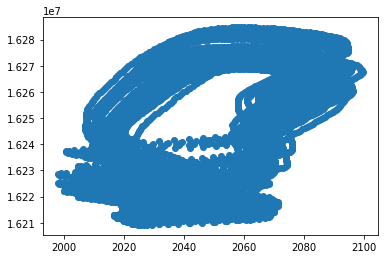

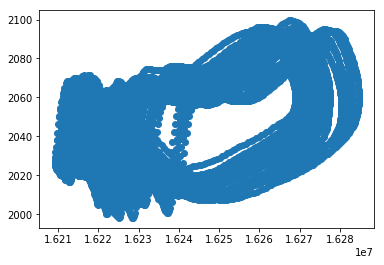

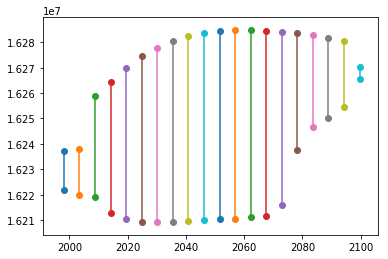

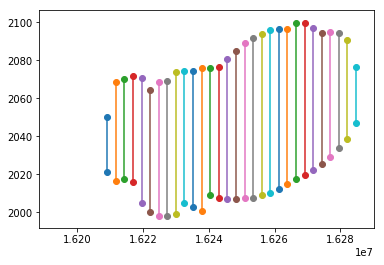

subj14log854.csv


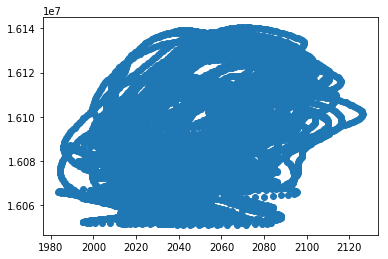

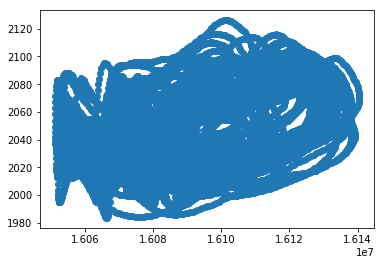

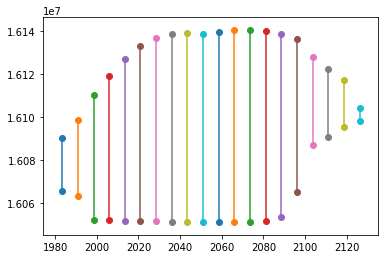

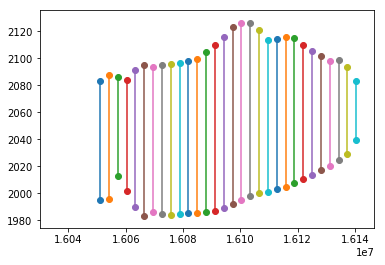

subj14log855.csv


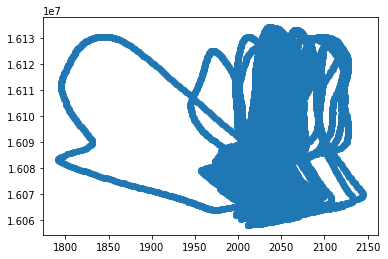

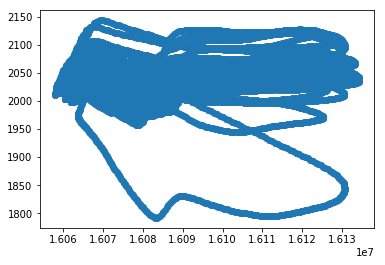

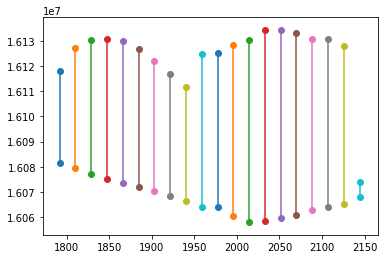

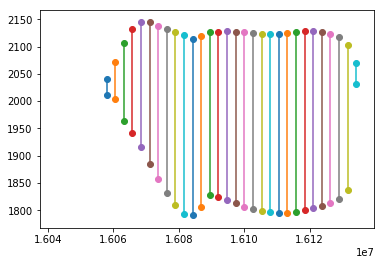

subj14log856.csv


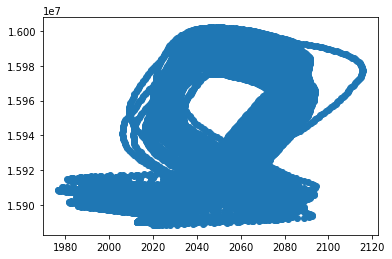

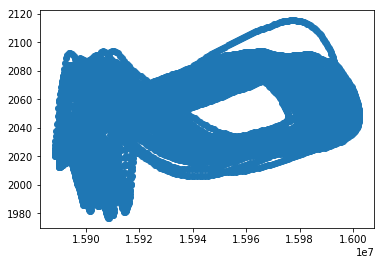

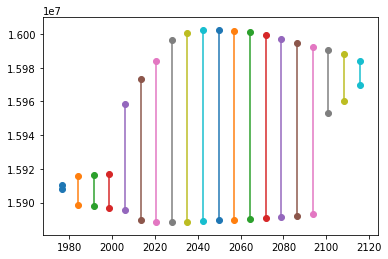

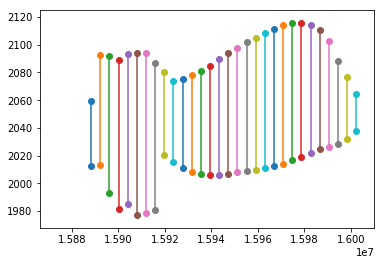

subj14log857.csv


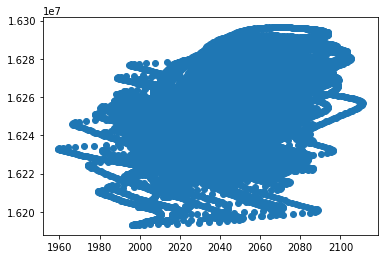

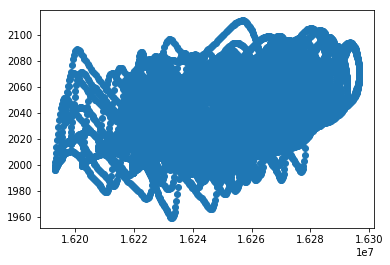

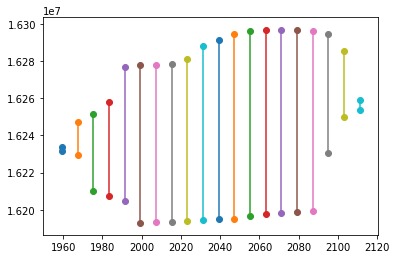

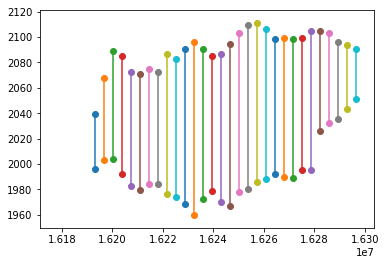

subj14log858.csv


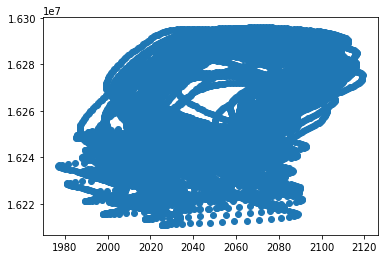

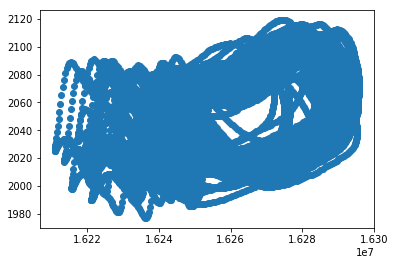

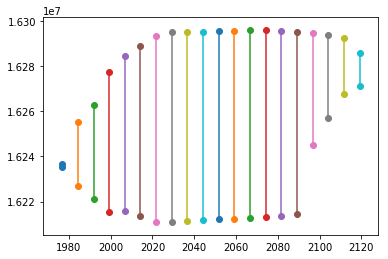

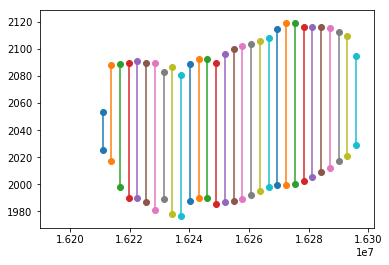

subj14log859.csv


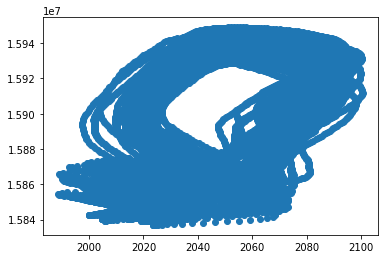

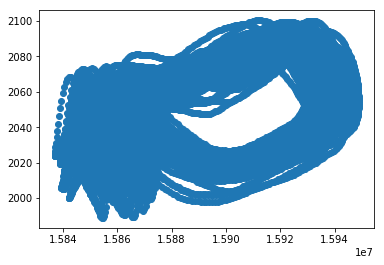

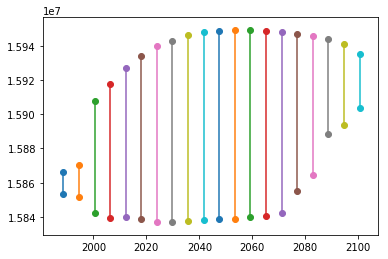

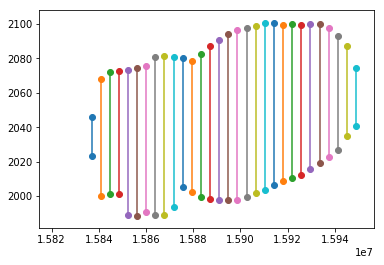

subj14log860.csv


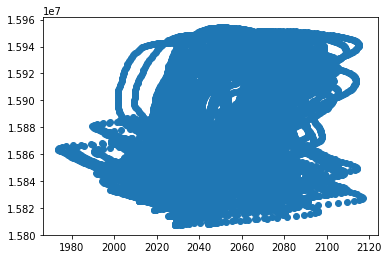

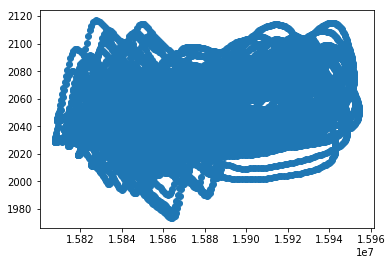

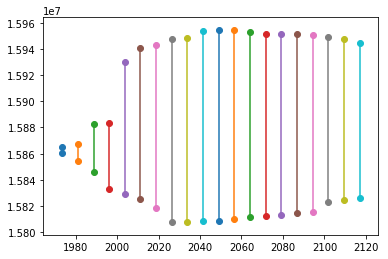

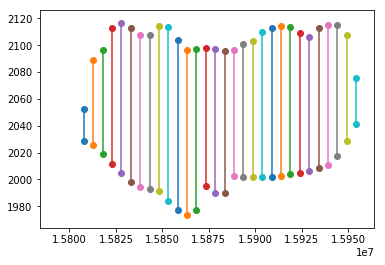

subj14log861.csv


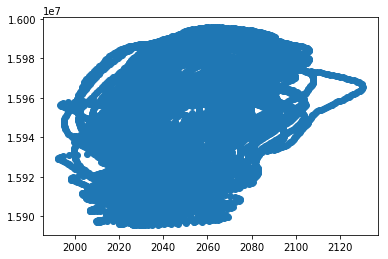

In [ ]:
table = get_tables()

In [50]:
# Построение сглаживающих последовательностей
import statistics as stat

def get_smooth_seq(seq, window):
    res = []
    sm = sum(seq[:window])
    for i in range(len(seq) - window):
        res.append(sm / window)
        sm += seq[i + window] - seq[i]
    return res

In [9]:
# Генерация сглаживающих последовательностей для всех чуваков директории
import os

def gen_smooth_seq(dir='./blood-pressure-estimation-data/T1/'):
    files = os.listdir(dir)

    for file_name in files:
        if file_name[:4] != 'subj':
            continue
        print(file_name)
        df = pd.read_csv(dir + file_name, header=None)
        d1, d2 = df.loc[0, :]
        p1, p2 = df.loc[1:, 0].values, df.loc[1:, 1].values
        for window in [100, 250, 500, 1000, 2500, 5000, 10000]:
            s1, s2 = [d1], [d2]
            s1 += get_smooth_seq(p1, window)
            s2 += get_smooth_seq(p2, window)
            s = np.array([s1, s2], dtype=np.float64).transpose()
            os.makedirs(dir + 'smooth/' + str(window), exist_ok=True)
            pd.DataFrame(s).to_csv(dir + 'smooth/' + str(window) + '/' + file_name, header=False, index=False)

In [10]:
gen_smooth_seq()
gen_smooth_seq(dir='./blood-pressure-estimation-data/T2/')
gen_smooth_seq(dir='./blood-pressure-estimation-data/T3/')

subj11log673.csv
subj11log674.csv
subj11log675.csv
subj11log676.csv
subj11log677.csv
subj11log678.csv
subj11log679.csv
subj11log680.csv
subj11log681.csv
subj11log682.csv
subj11log683.csv
subj11log684.csv
subj11log685.csv
subj11log686.csv
subj11log687.csv
subj11log688.csv
subj11log689.csv
subj11log690.csv
subj11log691.csv
subj11log692.csv
subj11log693.csv
subj11log694.csv
subj11log695.csv
subj11log696.csv
subj11log697.csv
subj11log698.csv
subj11log699.csv
subj11log700.csv
subj11log701.csv
subj11log702.csv
subj11log703.csv
subj11log704.csv
subj11log705.csv
subj11log706.csv
subj11log707.csv
subj11log708.csv
subj11log709.csv
subj11log710.csv
subj11log711.csv
subj11log712.csv
subj11log713.csv
subj11log714.csv
subj11log715.csv
subj11log716.csv
subj11log717.csv
subj11log718.csv
subj11log719.csv
subj11log720.csv
subj11log721.csv
subj11log722.csv
subj11log723.csv
subj11log724.csv
subj11log725.csv
subj11log726.csv
subj11log727.csv
subj14log847.csv
subj14log848.csv
subj14log849.csv
subj14log850.c

subj26log1689.csv
subj26log1690.csv
subj26log1691.csv
subj26log1692.csv
subj26log1693.csv
subj26log1694.csv
subj26log1695.csv
subj26log1696.csv
subj26log1697.csv
subj26log1698.csv
subj26log1699.csv
subj26log1700.csv
subj26log1701.csv
subj26log1702.csv
subj26log1703.csv
subj26log1704.csv
subj26log1705.csv
subj26log1706.csv
subj26log1707.csv
subj26log1708.csv
subj26log1709.csv
subj26log1710.csv
subj26log1711.csv
subj26log1712.csv
subj26log1713.csv
subj26log1714.csv
subj26log1715.csv
subj26log1716.csv
subj26log1717.csv
subj26log1718.csv
subj26log1719.csv
subj26log1720.csv
subj26log1721.csv
subj26log1722.csv
subj26log1723.csv
subj26log1724.csv
subj26log1725.csv
subj26log1726.csv
subj26log1727.csv
subj26log1728.csv
subj26log1729.csv
subj26log1730.csv
subj26log1731.csv
subj26log1732.csv
subj26log1733.csv
subj26log1734.csv
subj26log1735.csv
subj26log1736.csv
subj27log1737.csv
subj27log1738.csv
subj27log1739.csv
subj27log1740.csv
subj27log1741.csv
subj27log1742.csv
subj27log1743.csv
subj27log1

subj12log781.csv
subj12log782.csv
subj12log783.csv
subj12log784.csv
subj12log785.csv
subj12log786.csv
subj12log787.csv
subj12log788.csv
subj12log789.csv
subj12log790.csv
subj12log791.csv
subj12log792.csv
subj12log793.csv
subj12log794.csv
subj13log795.csv
subj13log796.csv
subj13log797.csv
subj13log798.csv
subj13log799.csv
subj13log800.csv
subj13log801.csv
subj13log802.csv
subj13log803.csv
subj13log804.csv
subj13log805.csv
subj13log806.csv
subj13log807.csv
subj13log808.csv
subj13log809.csv
subj13log810.csv
subj13log811.csv
subj13log812.csv
subj13log813.csv
subj13log814.csv
subj13log815.csv
subj13log816.csv
subj13log817.csv
subj13log818.csv
subj13log819.csv
subj13log820.csv
subj13log821.csv
subj13log822.csv
subj13log823.csv
subj13log824.csv
subj13log825.csv
subj13log826.csv
subj13log827.csv
subj13log828.csv
subj13log829.csv
subj13log830.csv
subj13log831.csv
subj13log832.csv
subj13log833.csv
subj13log834.csv
subj13log835.csv
subj13log836.csv
subj13log837.csv
subj13log838.csv
subj13log839.c

subj20log1262.csv
subj20log1263.csv
subj20log1264.csv
subj20log1265.csv
subj20log1266.csv
subj20log1267.csv
subj20log1268.csv
subj20log1269.csv
subj20log1270.csv
subj20log1271.csv
subj20log1272.csv
subj20log1273.csv
subj20log1274.csv
subj20log1275.csv
subj20log1276.csv
subj20log1277.csv
subj20log1278.csv
subj20log1279.csv
subj20log1280.csv
subj20log1281.csv
subj20log1282.csv
subj20log1283.csv
subj20log1284.csv
subj20log1285.csv
subj20log1286.csv
subj20log1287.csv
subj20log1288.csv
subj23log1453.csv
subj23log1454.csv
subj23log1455.csv
subj23log1456.csv
subj23log1457.csv
subj23log1458.csv
subj23log1459.csv
subj23log1460.csv
subj23log1461.csv
subj23log1462.csv
subj23log1463.csv
subj23log1464.csv
subj23log1465.csv
subj23log1466.csv
subj23log1467.csv
subj23log1468.csv
subj23log1469.csv
subj23log1470.csv
subj23log1471.csv
subj23log1472.csv
subj23log1473.csv
subj23log1474.csv
subj23log1475.csv
subj23log1476.csv
subj23log1477.csv
subj23log1478.csv
subj23log1479.csv
subj23log1480.csv
subj23log1

In [20]:
#Разбиение на validate и train людей
import random

def raking():
    people = set()
    for file_name in os.listdir("blood-pressure-estimation-data/T1/"):
        if file_name[:4] != 'subj':
            continue
        user = int(file_name[4:-4].split('log')[0])
        people.add(user)
    people = list(people)
    train_len = int(len(people) * 0.8)
    validate_len = len(people) - train_len
    train = []
    for i in range(train_len):
        man = random.choice(people)
        people.remove(man)
        train.append(man)
    validate = list(people)
    return train, validate

In [26]:
#Получение таблиц из разбиения

def get_train_tables(dir='./blood-pressure-estimation-data/T1/', train_mans=[], validate_mans=[], do_raking=False):
    files = os.listdir(dir)
    if do_raking:
        train_mans, validate_mans = raking()
    train_table = []
    validate_table = []
    for file_name in files:
        if file_name[:4] != 'subj':
            continue
        user, id = map(int, file_name[4:-4].split('log'))
        df = pd.read_csv(dir + file_name, header=None)
        d1, d2 = df.loc[0, :]
        p1, p2 = df.loc[1:, 0].values, df.loc[1:, 1].values
        row = [user, id, d1, d2] + get_data(p1) + get_data(p2)
        if user in train_mans:
            train_table.append(row)
        if user in validate_mans:
            validate_table.append(row)
    return np.array(train_table, dtype=np.int64), np.array(validate_table, dtype=np.int64) 

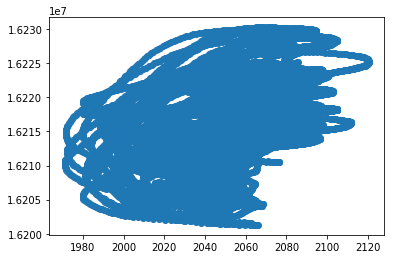

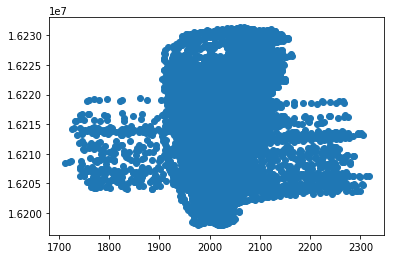

In [42]:
%matplotlib inline
import matplotlib.pyplot as plot
df = pd.read_csv("./blood-pressure-estimation-data/T1/smooth/100/subj11log673.csv", header=None)
df = df.loc[1:,:]
plot.scatter(df[1], df[0])
plot.show()
df = pd.read_csv("./blood-pressure-estimation-data/T1/subj11log673.csv", header=None)
df = df.loc[1:,:]
plot.scatter(df[1], df[0])
plot.show()